# Research for improve revenue 

Battleplan:
1. Study the data and watch out for outliers, Null and something "suspicious"
2. explain how to get rid of the weird Values
3. prepare the columns and check the data is clean
4. making calculations
5. Result

## Project description
You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.
You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze clients' behavior and determine which prepaid plan brings in more revenue.

[Step1](#step1):
[Step2](#step3):
[Step3](#step4):
[Step4](#step5):
[General Conclusion(5)](#step5):


## Step 1. Open the data file and study the general information <a id='step1'></a>

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt 
from functools import reduce
import math
import warnings
warnings.filterwarnings("ignore")
try:
    calls = pd.read_csv(r"C:\Users\Worker1\Desktop\yes\megaline_calls.csv")
    internet = pd.read_csv(r"C:\Users\Worker1\Desktop\yes\megaline_internet.csv")
    messages = pd.read_csv(r"C:\Users\Worker1\Desktop\yes\megaline_messages.csv")
    plans = pd.read_csv(r"C:\Users\Worker1\Desktop\yes\megaline_plans.csv")
    users = pd.read_csv(r"C:\Users\Worker1\Desktop\yes\megaline_users.csv")
except:
    calls = pd.read_csv("/datasets/megaline_calls.csv")
    internet = pd.read_csv("/datasets/megaline_internet.csv")
    messages = pd.read_csv("/datasets/megaline_messages.csv")
    plans = pd.read_csv("/datasets/megaline_plans.csv")
    users = pd.read_csv("/datasets/megaline_users.csv")
display(internet.head())
display(messages.info())



,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
id              76051 non-null object
user_id         76051 non-null int64
message_date    76051 non-null object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


None

In [26]:
def showdata(df):
    display(df.head())
    display(df.info())
    display(df.describe())
    display(df.isnull().sum() * 100 / len(df))
fordf = [calls, internet, messages, plans, users]
names = ["calls", "internet", "messages", "plans", "users"]
for df in fordf:
    
    showdata(df)

,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,9,12
1,1000_145,1000,2018-12-27,14,12
2,1000_247,1000,2018-12-27,15,12
3,1000_309,1000,2018-12-28,6,12
4,1000_380,1000,2018-12-30,5,12


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 5 columns):
id           137735 non-null object
user_id      137735 non-null int64
call_date    137735 non-null datetime64[ns]
duration     137735 non-null int64
month        137735 non-null int64
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 5.3+ MB


None

,user_id,duration,month
count,137735.000000,137735.000000,137735.000000
mean,1247.658046,7.146673,9.320797
std,139.416268,5.953919,2.412550
min,1000.000000,0.000000,1.000000
25%,1128.000000,2.000000,8.000000
50%,1247.000000,6.000000,10.000000
75%,1365.000000,11.000000,11.000000
max,1499.000000,38.000000,12.000000


id           0.0
user_id      0.0
call_date    0.0
duration     0.0
month        0.0
dtype: float64

,id,user_id,session_date,mb_used,month
0,1000_13,1000,2018-12-29,89.86,12
1,1000_204,1000,2018-12-31,0.00,12
2,1000_379,1000,2018-12-28,660.40,12
3,1000_413,1000,2018-12-26,270.99,12
4,1000_442,1000,2018-12-27,880.22,12


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 5 columns):
id              104825 non-null object
user_id         104825 non-null int64
session_date    104825 non-null datetime64[ns]
mb_used         104825 non-null float64
month           104825 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 4.0+ MB


None

,user_id,mb_used,month
count,104825.000000,104825.000000,104825.000000
mean,1242.496361,366.713701,9.342552
std,142.053913,277.170542,2.400404
min,1000.000000,0.000000,1.000000
25%,1122.000000,136.080000,8.000000
50%,1236.000000,343.980000,10.000000
75%,1367.000000,554.610000,11.000000
max,1499.000000,1693.470000,12.000000


id              0.0
user_id         0.0
session_date    0.0
mb_used         0.0
month           0.0
dtype: float64

,id,user_id,message_date,month
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 4 columns):
id              76051 non-null object
user_id         76051 non-null int64
message_date    76051 non-null datetime64[ns]
month           76051 non-null int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 2.3+ MB


None

,user_id,month
count,76051.000000,76051.000000
mean,1245.972768,9.584016
std,139.843635,2.276392
min,1000.000000,1.000000
25%,1123.000000,8.000000
50%,1251.000000,10.000000
75%,1362.000000,12.000000
max,1497.000000,12.000000


id              0.0
user_id         0.0
message_date    0.0
month           0.0
dtype: float64

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
usd_monthly_pay          2 non-null int64
usd_per_gb               2 non-null int64
usd_per_message          2 non-null float64
usd_per_minute           2 non-null float64
plan                     2 non-null object
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


None

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
std,671.751442,10861.160159,1767.766953,35.355339,2.12132,0.014142,0.014142
min,50.000000,15360.000000,500.000000,20.000000,7.00000,0.010000,0.010000
25%,287.500000,19200.000000,1125.000000,32.500000,7.75000,0.015000,0.015000
50%,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
75%,762.500000,26880.000000,2375.000000,57.500000,9.25000,0.025000,0.025000
max,1000.000000,30720.000000,3000.000000,70.000000,10.00000,0.030000,0.030000


messages_included        0.0
mb_per_month_included    0.0
minutes_included         0.0
usd_monthly_pay          0.0
usd_per_gb               0.0
usd_per_message          0.0
usd_per_minute           0.0
plan                     0.0
dtype: float64

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2021-02-13
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2021-02-13
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,2021-02-13
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,2021-02-13
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,2021-02-13


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
first_name    500 non-null object
last_name     500 non-null object
age           500 non-null int64
city          500 non-null object
reg_date      500 non-null datetime64[ns]
plan          500 non-null object
churn_date    500 non-null datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


None

,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


user_id       0.0
first_name    0.0
last_name     0.0
age           0.0
city          0.0
reg_date      0.0
plan          0.0
churn_date    0.0
dtype: float64

## Step 2. Prepare the data
Convert the data to the necessary types
Find and eliminate errors in the data

In [3]:

users["churn_date"] = users["churn_date"].fillna("2021-02-13")#get rid of nan values


In [4]:
users.head()


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2021-02-13
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2021-02-13
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,2021-02-13
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,2021-02-13
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,2021-02-13


In [5]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')#convert the data format
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')

calls['month'] = pd.DatetimeIndex(calls['call_date']).month # create the column month
internet['month'] = pd.DatetimeIndex(internet['session_date']).month
messages['month'] = pd.DatetimeIndex(messages['message_date']).month



In [6]:
def round_up(number):#create a function to round up
    return  math.ceil(number/1)*1

calls["duration"] = calls["duration"].apply(round_up)#apply it
print(calls.head())

         id  user_id  call_date  duration  month
0   1000_93     1000 2018-12-27         9     12
1  1000_145     1000 2018-12-27        14     12
2  1000_247     1000 2018-12-27        15     12
3  1000_309     1000 2018-12-28         6     12
4  1000_380     1000 2018-12-30         5     12


In [7]:
pcalls = calls.pivot_table(index=['user_id', "month"], values='duration', aggfunc='sum')#pivot the table and prepare to merge
pinternet= internet.pivot_table(index=['user_id', "month"], values='mb_used', aggfunc='sum')
pmessages= messages.pivot_table(index=['user_id', "month"], values='message_date', aggfunc='count')



In [8]:
plans = plans.rename(columns={'plan_name': 'plan'})#rename the column for better understanding

In [9]:
total1= pd.merge(left = pcalls , 
                right = pinternet, how='outer',on=['user_id', "month"]).fillna(0)#merge the data with precode
total2=pd.merge(left = total1 , 
                right = pmessages, how='outer',on=['user_id', "month"]).fillna(0).reset_index()
total3=pd.merge(left = total2 , 
                right = users, how='outer',on=['user_id']).fillna(0)
total4=pd.merge(left = total3 , 
                right = plans, how='outer',on=["plan"]).fillna(0)

total4 = total4.rename(columns={'message_date': 'message_count'})#rename the column message count
total4['month']=total4['month'].astype('int')#change type to integer
total4['message_count']=total4['message_count'].astype('int')#change type to integer
total4['duration']=total4['duration'].astype('int')#change type
total4 = total4.rename(columns={'duration': 'duration_minutes'})#rename the duration for better understanding with minutes

total4.head()

,user_id,month,duration_minutes,mb_used,message_count,first_name,last_name,age,city,reg_date,plan,churn_date,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,1000,12,124,1901.47,11,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2021-02-13,1000,30720,3000,70,7,0.01,0.01
1,1006,11,10,2068.37,15,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,1000,30720,3000,70,7,0.01,0.01
2,1006,12,59,32118.82,139,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,1000,30720,3000,70,7,0.01,0.01
3,1008,10,476,17106.99,21,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,2021-02-13,1000,30720,3000,70,7,0.01,0.01
4,1008,11,446,23676.72,37,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,2021-02-13,1000,30720,3000,70,7,0.01,0.01


In [10]:


total4["mb_used"] = total4["mb_used"] / 1024
total4 = total4.rename(columns={'mb_used': 'gb_used'})
total4["gb_used"] = total4["gb_used"].apply(round_up)#apply the function and round up
print(plans)
total4.head(30)#print and check everything is working

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute      plan  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


,user_id,month,duration_minutes,gb_used,message_count,first_name,last_name,age,city,reg_date,plan,churn_date,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,1000,12,124,2,11,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2021-02-13,1000,30720,3000,70,7,0.01,0.01
1,1006,11,10,3,15,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,1000,30720,3000,70,7,0.01,0.01
2,1006,12,59,32,139,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,1000,30720,3000,70,7,0.01,0.01
3,1008,10,476,17,21,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,2021-02-13,1000,30720,3000,70,7,0.01,0.01
4,1008,11,446,24,37,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,2021-02-13,1000,30720,3000,70,7,0.01,0.01
5,1008,12,634,15,26,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,2021-02-13,1000,30720,3000,70,7,0.01,0.01
6,1011,6,118,7,21,Halina,Henry,73,"Cleveland-Elyria, OH MSA",2018-01-18,ultimate,2021-02-13,1000,30720,3000,70,7,0.01,0.01
7,1011,7,499,21,53,Halina,Henry,73,"Cleveland-Elyria, OH MSA",2018-01-18,ultimate,2021-02-13,1000,30720,3000,70,7,0.01,0.01
8,1011,8,486,21,54,Halina,Henry,73,"Cleveland-Elyria, OH MSA",2018-01-18,ultimate,2021-02-13,1000,30720,3000,70,7,0.01,0.01
9,1011,9,484,17,60,Halina,Henry,73,"Cleveland-Elyria, OH MSA",2018-01-18,ultimate,2021-02-13,1000,30720,3000,70,7,0.01,0.01


In [11]:

print("January")
print(total4.query('month == "1"').mean())
print("March")
print(total4.query('month == "3"').mean())
print("December")
print(total4.query('month == "12"').mean())

January
user_id                   1179.333333
month                        1.000000
duration_minutes           196.666667
gb_used                      6.500000
message_count               13.833333
age                         42.500000
messages_included          683.333333
mb_per_month_included    25600.000000
minutes_included          2166.666667
usd_monthly_pay             53.333333
usd_per_gb                   8.000000
usd_per_message              0.016667
usd_per_minute               0.016667
dtype: float64
March
user_id                   1238.000000
month                        3.000000
duration_minutes           321.171429
gb_used                     15.228571
message_count               16.971429
age                         46.400000
messages_included          375.714286
mb_per_month_included    20626.285714
minutes_included          1357.142857
usd_monthly_pay             37.142857
usd_per_gb                   8.971429
usd_per_message              0.023143
usd_per_minute       

The monthly revenue from each user

In [12]:
def cost(row):#create a function for the total month cost per user/ revenue per user per month

    gb_used=row['gb_used']
    message_count=row['message_count']
    duration_minutes=row['duration_minutes']
    plan=row["plan"]
    mb_per_month_included=row["mb_per_month_included"]
    usd_per_gb = row["usd_per_gb"]
    messages_included=row["messages_included"]
    message_count=row["message_count"]
    usd_per_message=row["usd_per_message"]
    minutes_included=row["minutes_included"]
    usd_per_minute=row["usd_per_minute"]
    usd_monthly_pay=row["usd_monthly_pay"]
    

    if gb_used>(mb_per_month_included/1024):
        dif = gb_used-(mb_per_month_included/1024)
        overused = dif * usd_per_gb
    else: overused = 0
        
    if message_count>messages_included:
        dif2=message_count-messages_included
        overused2 =dif2 * usd_per_message
    else: overused2 = 0
        
    if duration_minutes>minutes_included:
        dif3=duration_minutes-minutes_included
        overused3 = dif3*usd_per_minute
       
    else: overused3 = 0
        
    total_cost=  overused3+overused2+overused+usd_monthly_pay
    return total_cost

total4['total_cost']=total4.apply(cost,axis=1)



In [13]:
display(total4.head())# check the total cost cost column is added

,user_id,month,duration_minutes,gb_used,message_count,first_name,last_name,age,city,reg_date,plan,churn_date,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,total_cost
0,1000,12,124,2,11,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2021-02-13,1000,30720,3000,70,7,0.01,0.01,70.0
1,1006,11,10,3,15,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,1000,30720,3000,70,7,0.01,0.01,70.0
2,1006,12,59,32,139,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,1000,30720,3000,70,7,0.01,0.01,84.0
3,1008,10,476,17,21,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,2021-02-13,1000,30720,3000,70,7,0.01,0.01,70.0
4,1008,11,446,24,37,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,2021-02-13,1000,30720,3000,70,7,0.01,0.01,70.0


Conclusion: Step 2 <a id='step2'></a>


I filled in the NaN values, prepared the data to merge, created functions to round and adapted the data types. I have noticed a few outlier which, however, will have no influence on the analysis (10 user's with month 0 and other 0 values), which is why I keep this. I noticed that in December more data is sent than in other months, I guess it’s Christmas.


Step 3. Analyze the data
Describe the customers' behavior. Find the minutes, texts, and volume of data the users of each plan require per month. Calculate the mean, dispersion, and standard deviation. Plot histograms. Describe the distributions.

In [14]:
grouped_data=total4.groupby('month').agg({'duration_minutes': ['count', 'sum','mean'], 'gb_used': ['count', 'sum','mean'], 'message_count': ['count', 'sum','mean']})
total_ultimate = total4.query('plan == "ultimate"')#split the data in 2 plans: surf and ultimate
total_surf = total4.query('plan != "ultimate"')
total_surf.groupby('month').agg({'duration_minutes': ['count', 'sum','mean'], 'gb_used': ['count', 'sum','mean'], 'message_count': ['count', 'sum','mean']})



duration_minutes                     gb_used                   \
                 count     sum        mean   count   sum       mean   
month                                                                 
0                    6       0    0.000000       6     0   0.000000   
1                    2     406  203.000000       2    10   5.000000   
2                    9    2673  297.000000       9   110  12.222222   
3                   23    7590  330.000000      23   312  13.565217   
4                   50   17577  351.540000      50   611  12.220000   
5                   77   30768  399.584416      77  1087  14.116883   
6                   97   41836  431.298969      97  1502  15.484536   
7                  121   54448  449.983471     121  2042  16.876033   
8                  162   66438  410.111111     162  2735  16.882716   
9                  194   80360  414.226804     194  3238  16.690722   
10                 237  101846  429.729958     237  4126  17.409283   
11                 283  119801  423.325088     283  4650  16.431095   
12                 318  150680  473.836478     318  5800  18.238994   

      message_count                    
              count    sum       mean  
month                                  
0                 6      0   0.000000  
1                 2     21  10.500000  
2                 9    108  12.000000  
3                23    351  15.260870  
4                50    870  17.400000  
5                77   1849  24.012987  
6                97   2454  25.298969  
7               121   3271  27.033058  
8               162   4662  28.777778  
9               194   5968  30.762887  
10              237   8020  33.839662  
11              283   9165  32.385159  
12              318  12275  38.600629

In [15]:
total_ultimate.groupby('month').agg({'duration_minutes': ['count', 'sum','mean'], 'gb_used': ['count', 'sum','mean'], 'message_count': ['count', 'sum','mean']})

duration_minutes                    gb_used                   \
                 count    sum        mean   count   sum       mean   
month                                                                
0                    4      0    0.000000       4     0   0.000000   
1                    4    774  193.500000       4    29   7.250000   
2                    7   2822  403.142857       7   121  17.285714   
3                   12   3651  304.250000      12   221  18.416667   
4                   21   7074  336.857143      21   343  16.333333   
5                   29  11781  406.241379      29   489  16.862069   
6                   47  17435  370.957447      47   725  15.425532   
7                   59  25197  427.067797      59   973  16.491525   
8                   71  29922  421.436620      71  1267  17.845070   
9                   86  37626  437.511628      86  1463  17.011628   
10                 106  47778  450.735849     106  1878  17.716981   
11                 127  56540  445.196850     127  2174  17.118110   
12                 151  69324  459.099338     151  2778  18.397351   

      message_count                   
              count   sum       mean  
month                                 
0                 4     0   0.000000  
1                 4    62  15.500000  
2                 7   151  21.571429  
3                12   243  20.250000  
4                21   463  22.047619  
5                29   931  32.103448  
6                47  1379  29.340426  
7                59  1937  32.830508  
8                71  2732  38.478873  
9                86  3259  37.895349  
10              106  4181  39.443396  
11              127  4903  38.606299  
12              151  6796  45.006623

In [16]:
dmu=total_ultimate["duration_minutes"].mean()#means for ultimate
gbu=total_ultimate["gb_used"].mean()
mcu=total_ultimate["message_count"].mean()

print("The mean for minutesduration is {:.2f}".format(dmu) )
print("The mean for used GB per month is {:.2f}".format(gbu) )
print("The mean for counted messages is {:.2f}".format(mcu) )

The mean for minutesduration is 428.07
The mean for used GB per month is 17.21
The mean for counted messages is 37.34


In [17]:
dms=total_surf["duration_minutes"].mean()#means for surf
gbs=total_surf["gb_used"].mean()
mcs=total_surf["message_count"].mean()

print("The mean for minutesduration with the surf plan is {:.2f}".format(dms) )
print("The mean for used GB per month with the surf plan is {:.2f}".format(gbs) )
print("The mean for counted messages with the surf plan is {:.2f}".format(mcs) )

The mean for minutesduration with the surf plan is 427.12
The mean for used GB per month with the surf plan is 16.61
The mean for counted messages with the surf plan is 31.04


In [18]:
def jetit(df,column,function,plan):#create a fucntion to plot histograms and insert a function,column and the plan
    dmu=df[column].agg(function)

    print("The {} for {} in {} is {:.2f}".format(function,column,plan,dmu) )
    df[column].hist(alpha=0.5, density=True)
    plt.title("histogram for {}".format(column))
    plt.xlabel(column)
    plt.ylabel('density')
    
    

In [19]:
def jetpunch(column):  #create a function for the function to fill it faster
    jetit(total_surf,column ,"mean", "surf" )
    jetit(total_ultimate,column ,"mean", "ultimate" )
    plt.show()
    jetit(total_surf,column ,"var", "surf" )
    jetit(total_ultimate,column ,"var", "ultimate" )
    plt.show()
    jetit(total_surf,column ,"std", "surf" )
    jetit(total_ultimate,column ,"std", "ultimate" )
    plt.show()
    

The mean for duration_minutes in surf is 427.12
The mean for duration_minutes in ultimate is 428.07


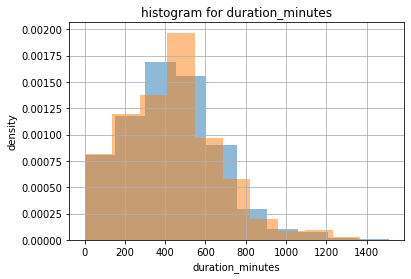

The var for duration_minutes in surf is 55455.58
The var for duration_minutes in ultimate is 58543.88


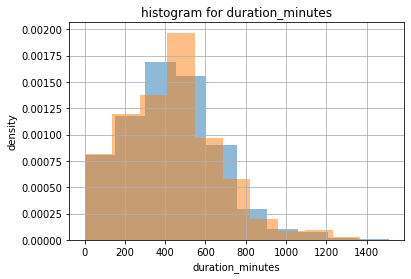

The std for duration_minutes in surf is 235.49
The std for duration_minutes in ultimate is 241.96


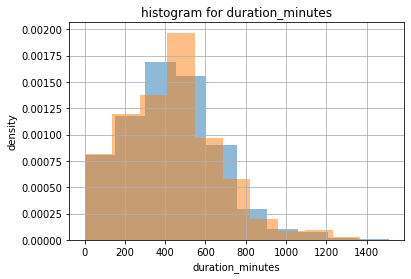

The mean for gb_used in surf is 16.61
The mean for gb_used in ultimate is 17.21


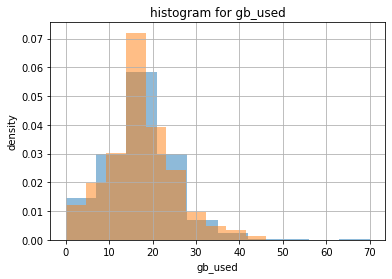

The var for gb_used in surf is 62.40
The var for gb_used in ultimate is 60.15


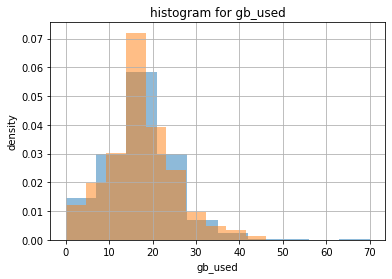

The std for gb_used in surf is 7.90
The std for gb_used in ultimate is 7.76


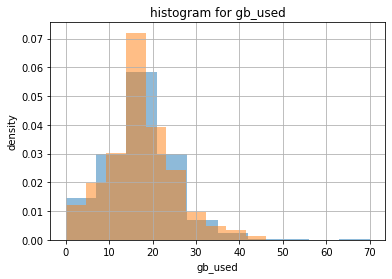

The mean for message_count in surf is 31.04
The mean for message_count in ultimate is 37.34


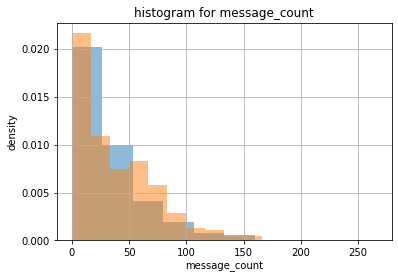

The var for message_count in surf is 1126.12
The var for message_count in ultimate is 1209.83


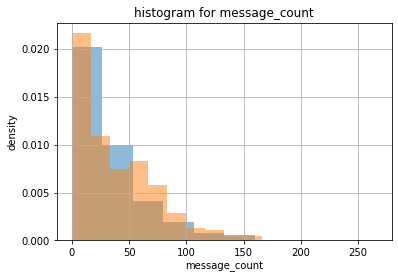

The std for message_count in surf is 33.56
The std for message_count in ultimate is 34.78


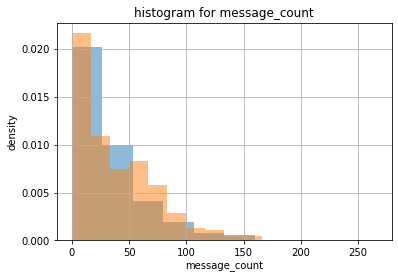

In [20]:
jetpunch("duration_minutes")#apply the function for the function
jetpunch("gb_used")
jetpunch("message_count")

Conclusion step 3 <a id='step3'></a>

I have noticed that surf always has lower average values than ultimate. Maybe the surf users pay more attention to their consumption/usage.

##  Test the hypotheses


The average revenue from users of Ultimate and Surf calling plans differs.
The average revenue from users in NY-NJ area is different from that of the users from other regions.
You decide what alpha value to use.
Explain:
How you formulated the null and alternative hypotheses.
What criterion you used to test the hypotheses and why.

In [21]:
#The average revenue from users of Ultimate and Surf calling plans differs.
ru =total_ultimate["total_cost"]
rs =total_surf["total_cost"]


alpha = 0.05 # your code: set a critical statistical significance level

results = st.ttest_ind(
    ru, 
    rs,equal_var=True)

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")


p-value: 1.724423314124219e-08
We reject the null hypothesis


Nullhypotheses is: The revenue for the surf and ultimate is equal.
Alternatehypotheses is: The revenue for the surf and ultimate is not equal.

The Revenue for the ultimateplan is higher and differs from the surf plan. 
We reject the Nullhypotheses and confirm the alternate hypotheses.
The p value confirm our test is not randomized.

The average revenue from users in NY-NJ area is different from that of the users from other regions.

In [22]:
total4["city"].unique()#check for wich  city string i need to query or locate

array(['Atlanta-Sandy Springs-Roswell, GA MSA',
       'San Francisco-Oakland-Berkeley, CA MSA',
       'Orlando-Kissimmee-Sanford, FL MSA', 'Cleveland-Elyria, OH MSA',
       'Knoxville, TN MSA', 'Houston-The Woodlands-Sugar Land, TX MSA',
       'Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA',
       'Chicago-Naperville-Elgin, IL-IN-WI MSA',
       'New York-Newark-Jersey City, NY-NJ-PA MSA',
       'Birmingham-Hoover, AL MSA', 'Oklahoma City, OK MSA',
       'Denver-Aurora-Lakewood, CO MSA',
       'Seattle-Tacoma-Bellevue, WA MSA',
       'Nashville-Davidson–Murfreesboro–Franklin, TN MSA',
       'Columbus, OH MSA', 'Las Vegas-Henderson-Paradise, NV MSA',
       'Indianapolis-Carmel-Anderson, IN MSA',
       'Miami-Fort Lauderdale-West Palm Beach, FL MSA',
       'Columbia, SC MSA', 'San Antonio-New Braunfels, TX MSA',
       'Charlotte-Concord-Gastonia, NC-SC MSA',
       'Phoenix-Mesa-Chandler, AZ MSA',
       'Riverside-San Bernardino-Ontario, CA MSA',
       'Grand Rapids-Ken

In [23]:
new_york = total4[total4['city'] == 'New York-Newark-Jersey City, NY-NJ-PA MSA']["total_cost"]# create variable for new york

not_new_york =total4[total4['city'] != 'New York-Newark-Jersey City, NY-NJ-PA MSA']["total_cost"]#create variable for not new york

alpha = 0.05

results = st.ttest_ind(
    new_york, 
    not_new_york,equal_var=True)

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value: 0.04974528277407644
We reject the null hypothesis


The average revenue from users in NY-NJ area is different from that of the users from other regions.


Nullhypotheses is: The revenue for the New York users and not New York users is equal.
Alternatehypotheses is: The revenue for the New York users and not New York users is not equal.

The average Revenue for New York users are different. 
We reject the Nullhypotheses and confirm the alternate hypotheses.
The p value confirm our test is not randomized, but is really close to 5 % randomness. I keep that in mind.

Step 4 Conclusion<a id='step4'></a>

I can reject the null hypothesis in both hypotheses because there are differences. But i keep in mind that the second Test was close to be randomized.

## General Conclusion<a id='step5'></a>

I have noticed that the Ultimate package brings more revenue and we should promote it. In addition, the users of New York are different from the others, which can also be random. Overall it can be said that the surf users make fewer calls and use gb than the ultimate users, possibly this is due to the extra costs should they use them beyond the surf package.
